In [ ]:

!pip install torchvis

In [ ]:
import torch

# Creating a tensor
x = torch.tensor([1.0, 2.0, 3.0])
print(x)

# Basic operations
y = torch.tensor([4.0, 5.0, 6.0])
print(x + y)  # Element-wise addition
print(x * y)  # Element-wise multiplication

# Matrix operations
a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
b = torch.tensor([[5.0, 6.0], [7.0, 8.0]])
print(torch.matmul(a, b))  # Matrix multiplication

tensor([1., 2., 3.])
tensor([5., 7., 9.])
tensor([ 4., 10., 18.])
tensor([[19., 22.],
        [43., 50.]])


In [ ]:
# Create tensors with requires_grad=True to track computations
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2  # Some function of x

# Compute gradients
y.backward()  # Backpropagate to compute gradients
print(x.grad)  # Print the gradient of y with respect to x

tensor(4.)


In [1]:
!pip install torchvis
import torch
import torch.nn as nn
from torchviz import make_dot

# Define the computation
x1 = torch.randn(1, requires_grad=True)
x2 = torch.randn(1, requires_grad=True)
y = nn.functional.sigmoid(x1 * 2 + x2)
z = y ** 2

# Create a graph from the output tensor
graph = make_dot(z, params={'x1': x1, 'x2': x2, 'y': y, 'z': z})
graph

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for dict: filename=dict-2020.12.3-py3-none-any.whl size=1622 sha256=b19378f41d28332a0de85c8e4994601f3def7414ec3cf72c3deb7d2d10cf4dd7
  Stored in directory: /root/.cache/pip/wheels/be/16/91/2662873aebe20df5239ceddaa23e342c1619683ae231d1c9e3
  Created wheel for values: filename=values-2020.12.3-py3-none-any.whl size=1337 sha256=37fbad6b42bd72e812e69b96bbc1c7ab951b2eab25c321bfc541df08b028d4f7
  Stored in directory: /root/.cache/pip/wheels/a7/bc/50/73bf2f3bc5ea44e3a0ca1ce38c2fa0d05967ef3ff5d5698978
Successfully built dict values


ModuleNotFoundError: No module named 'torchviz'

## Linear regression

y ~ ax + b

In [ ]:
import numpy as np
from torch import nn
import torch
import torch.optim as optim


'\nclass simple_linear_regression_fun:\n    # function for 1/2 sum_i |a x_i + b - y_i|^2\n    def __init__(self, x, y):\n        self.y = y # (n, ) ndarray\n        self.x = x # (n, ) ndarray\n\n    def fval(self, w: np.array):\n        a, b = w[0], w[1]\n        return 0.5 * np.sum((\n            a * self.x + b - self.y) ** 2)\n\n    def grad(self, w: np.array):\n        a, b = w[0], w[1]\n        delta = (a * self.x + b - self.y)\n        return np.array([delta.dot(self.x), delta.sum()])\n'

In [ ]:
import matplotlib.pyplot as plt
torch.manual_seed(0)
x = 0.2 + torch.rand(100, 1) * 0.8
y = 3.0 * x + 10.0 + 0.5 * torch.randn(100, 1)  # y = 3x + 10 + noise

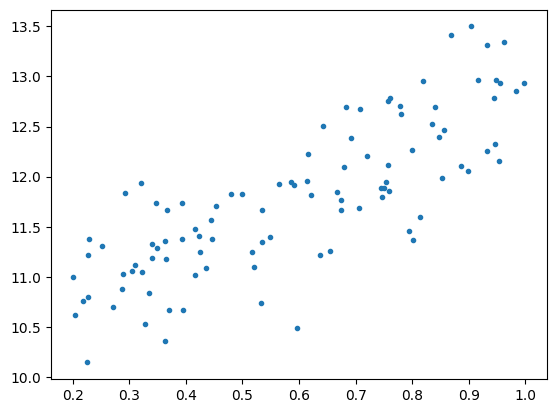

In [ ]:
plt.plot(x[:, 0], y[:, 0], '.')

In [ ]:
linear_func = nn.Linear(1, 1) # a, b
linear_func

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
list(linear_func.parameters())

[Parameter containing:
 tensor([[-0.0718]], requires_grad=True),
 Parameter containing:
 tensor([0.9892], requires_grad=True)]

Text(0, 0.5, 'y = ax + b')

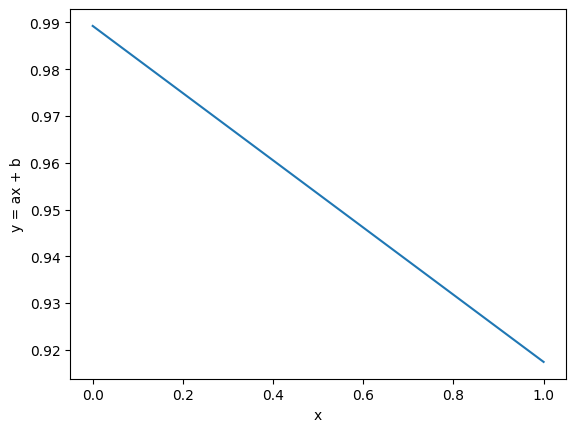

In [ ]:
x_ = torch.linspace(0, 1, 101).unsqueeze(1)
with torch.no_grad():
  y_ = linear_func(x_)

plt.plot(x_[:, 0], y_[:, 0])
plt.xlabel('x')
plt.ylabel('y = ax + b')

In [ ]:
optimizer = optim.SGD(linear_func.parameters(), lr=0.001)
linear_func.train()

for step in range(100):
    optimizer.zero_grad()
    y_pred = linear_func(x) ## y_ = ax+b
    loss = torch.sum((y_pred - y) ** 2)
    loss.backward()
    optimizer.step()

    if (step+1) % 20 == 0:
        print(f'Step [{step}], Loss: {loss.item():.4f}')

Step [19], Loss: 39.9466
Step [39], Loss: 34.3220
Step [59], Loss: 30.3000
Step [79], Loss: 27.3904
Step [99], Loss: 25.2855


Text(0, 0.5, 'y = ax + b')

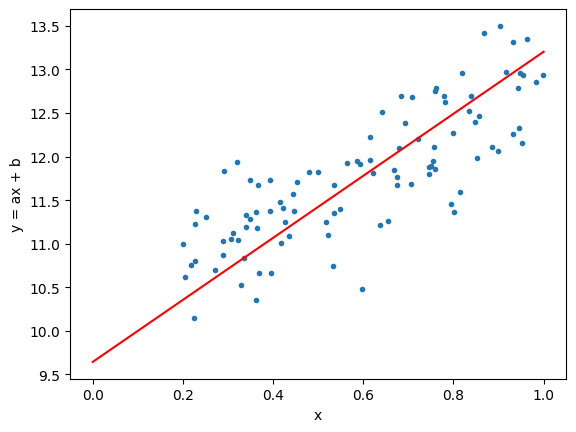

In [ ]:
x_ = torch.linspace(0, 1, 101).unsqueeze(1)
with torch.no_grad():
  y_ = linear_func(x_)

plt.plot(x[:, 0], y[:, 0], '.')
plt.plot(x_[:, 0], y_[:, 0], 'r')
plt.xlabel('x')
plt.ylabel('y = ax + b')

## logistic regression

y ~ sigmoid(ax + b)

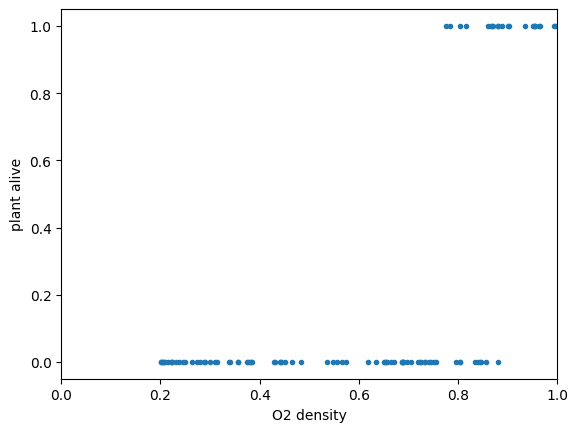

In [ ]:
o2_density = 0.2 + torch.rand(100, 1) * 0.8
plant_alive = ((3.0 * o2_density + 0.2 * torch.randn(100, 1) ) > 2.5).float()

plt.plot(o2_density, plant_alive, '.')
plt.xlabel('O2 density')
plt.ylabel('plant alive')
plt.xlim((0, 1))
plt.show()

In [ ]:
import numpy as np
from torch import nn
import torch
import torch.optim as optim

# y ~ sigmoid(ax + b)
logistic_func = torch.nn.Sequential(nn.Linear(1, 1),
                            nn.Sigmoid()
                            )


optimizer = optim.SGD(logistic_func.parameters(), lr=0.5)
logistic_func.train()
loss_func = torch.nn.BCELoss()

for step in range(20000):
    optimizer.zero_grad()
    y_pred = logistic_func(o2_density) ## y_ = sigmoid(ax+b)
    loss = loss_func(y_pred, plant_alive)
    loss.backward()
    optimizer.step()

    if (step+1) % 2000 == 0:
        print(f'Step [{step}], Loss: {loss.item():.4f}')

Step [1999], Loss: 0.2108
Step [3999], Loss: 0.1850
Step [5999], Loss: 0.1744
Step [7999], Loss: 0.1687
Step [9999], Loss: 0.1653
Step [11999], Loss: 0.1631
Step [13999], Loss: 0.1616
Step [15999], Loss: 0.1605
Step [17999], Loss: 0.1597
Step [19999], Loss: 0.1592


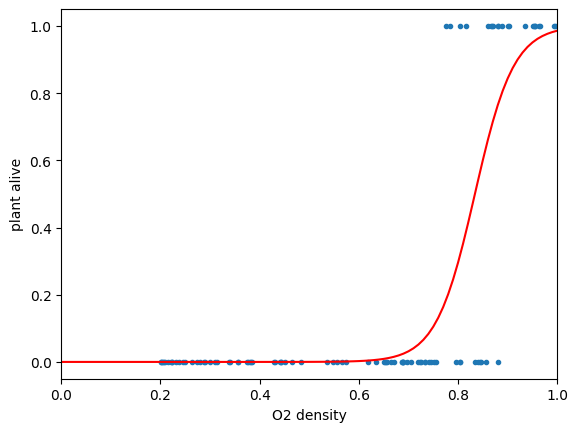

In [ ]:
x_ = torch.linspace(0, 1, 101).unsqueeze(1)
with torch.no_grad():
  y_ = logistic_func(x_)

plt.plot(o2_density, plant_alive, '.')
plt.plot(x_[:, 0], y_[:, 0], 'r')
plt.xlabel('O2 density')
plt.ylabel('plant alive')
plt.xlim((0, 1))
plt.show()

## XOR

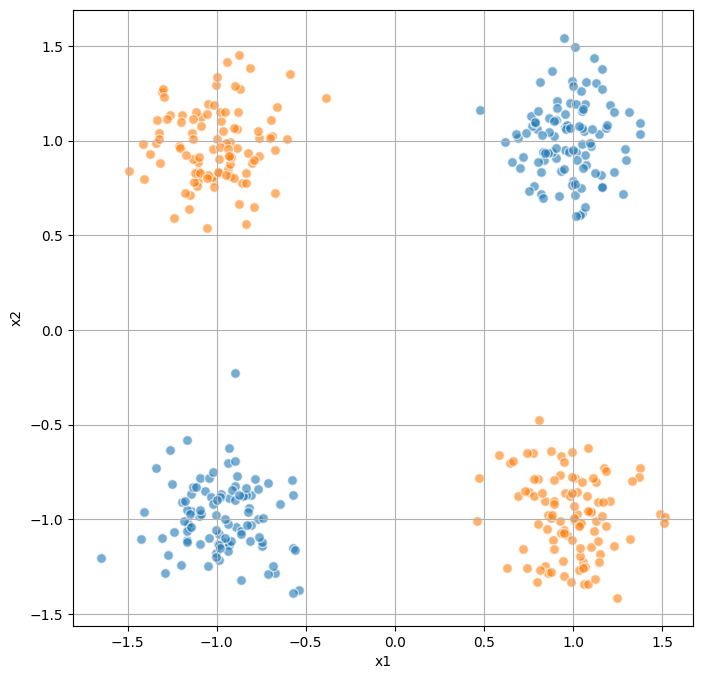

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
# Generate data
def generate_cluster(center, num_points, std_dev):
    return center + std_dev * np.random.randn(num_points, 2)

def make_xor_data(num_points_per_cluster = 100, cluster_std = 0.2):
  centers = np.array([
      [1, 1],
      [-1, -1],
      [-1, 1],
      [1, -1]
  ])
  # Create the dataset
  x = np.vstack([
      generate_cluster(centers[0], num_points_per_cluster, cluster_std),
      generate_cluster(centers[1], num_points_per_cluster, cluster_std),
      generate_cluster(centers[2], num_points_per_cluster, cluster_std),
      generate_cluster(centers[3], num_points_per_cluster, cluster_std)
  ])

  y = np.array([0] * (2 * num_points_per_cluster) + [1] * (2 * num_points_per_cluster))
  return x, y

x_train, y_train = make_xor_data(num_points_per_cluster = 100, cluster_std = 0.2)
x_eval, y_eval = make_xor_data(num_points_per_cluster = 100, cluster_std = 0.2)
x_train = torch.from_numpy(x_train.astype('float32'))
y_train = torch.from_numpy(y_train[:, None].astype('float32'))
x_eval = torch.from_numpy(x_eval.astype('float32'))
y_eval = torch.from_numpy(y_eval[:, None].astype('float32'))

plt.figure(figsize=(8, 8))
plt.scatter(x_train[y_train[:, 0] == 0, 0], x_train[y_train[:, 0]==0, 1], alpha=0.6, edgecolors='w', s=50)
plt.scatter(x_train[y_train[:, 0] == 1, 0], x_train[y_train[:, 0]==1, 1], alpha=0.6, edgecolors='w', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from torch import nn
import torch
import torch.optim as optim

logistic_func = torch.nn.Sequential(
                            nn.Linear(2, 1),
                            nn.Sigmoid()
                            )


optimizer = optim.SGD(logistic_func.parameters(), lr=0.5)
logistic_func.train()
loss_func = torch.nn.BCELoss()

for step in range(20000):
    optimizer.zero_grad()
    y_pred = logistic_func(data_tensor) ## y_ = sigmoid(ax+b)
    loss = loss_func(y_pred, label_tensor)
    loss.backward()
    optimizer.step()

    if (step+1) % 2000 == 0:
        print(f'Step [{step}], Loss: {loss.item():.4f}')

Step [1999], Loss: 0.6931
Step [3999], Loss: 0.6931
Step [5999], Loss: 0.6931
Step [7999], Loss: 0.6931
Step [9999], Loss: 0.6931
Step [11999], Loss: 0.6931
Step [13999], Loss: 0.6931
Step [15999], Loss: 0.6931
Step [17999], Loss: 0.6931
Step [19999], Loss: 0.6931


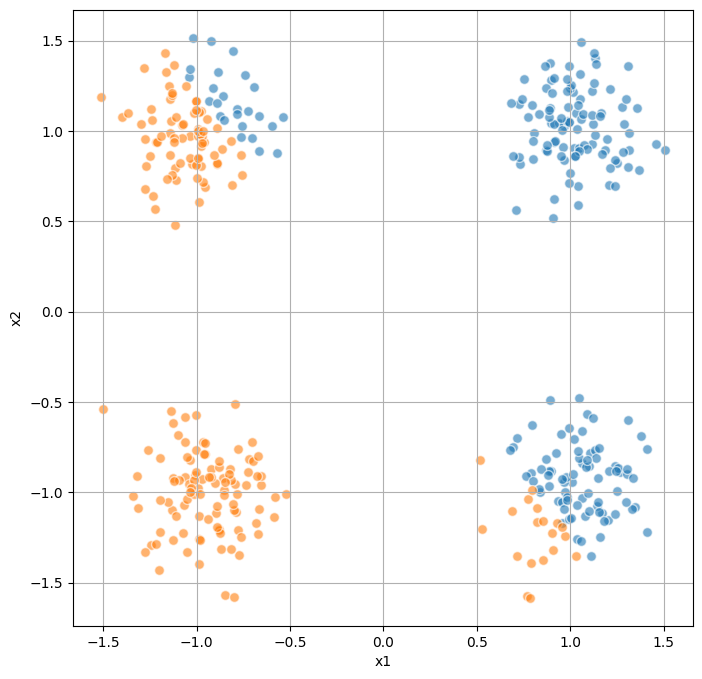

In [ ]:
with torch.no_grad():
  y_pred = logistic_func(x_eval) > 0.5

plt.figure(figsize=(8, 8))
plt.scatter(x_eval[y_pred[:, 0] == 0, 0], x_eval[y_pred[:, 0]==0, 1], alpha=0.6, edgecolors='w', s=50)
plt.scatter(x_eval[y_pred[:, 0] == 1, 0], x_eval[y_pred[:, 0]==1, 1], alpha=0.6, edgecolors='w', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [ ]:
list(logistic_func[0].parameters())

[Parameter containing:
 tensor([[-5.4029, -5.0831],
         [-5.6902, -5.7354]], requires_grad=True),
 Parameter containing:
 tensor([ 5.5197, -5.2551], requires_grad=True)]